## Scipy is an extremely useful library for scientific and numerical computing in Python. 
## It contains very useful submodules for Optimization, Fast Fourier Transform, Linear Algebra, Matrix Encoding, and Image Processing. 
## In fact, Scikit-learn uses it extensively for maniputating large sparse matrix, and for algorithms such as Ordinary Least Square!

## We will focus on the signal processing submodule for this exploration notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from scipy import signal

sns.set_style("whitegrid")

In [2]:
signals = pq.read_table('train.parquet', columns=[str(i) for i in range(999)]).to_pandas()
signals = signals.values.T.reshape((999//3, 3, 800000))

In [3]:
signals

array([[[ 18,  18,  17, ...,  17,  19,  17],
        [  1,   0,  -1, ...,   0,   1,   0],
        [-19, -19, -20, ..., -19, -18, -19]],

       [[-16, -17, -17, ..., -15, -14, -14],
        [ -5,  -6,  -6, ...,  -4,  -3,  -4],
        [ 19,  19,  19, ...,  21,  22,  21]],

       [[-15, -17, -17, ..., -16, -16, -17],
        [ 15,  16,  15, ...,  14,  17,  14],
        [ -1,   0,  -3, ...,  -2,  -1,  -4]],

       ...,

       [[-18, -20, -20, ..., -19, -19, -18],
        [ 10,   8,   6, ...,   7,   8,   9],
        [  9,   8,   6, ...,   8,   8,   9]],

       [[ 18,  20,  17, ...,  16,  16,  14],
        [-20, -19, -22, ..., -19, -19, -21],
        [  1,   2,   0, ...,   1,   1,   0]],

       [[ 18,  18,  18, ...,  19,  20,  19],
        [-19, -18, -18, ..., -17, -18, -17],
        [ -6,  -6,  -6, ...,  -5,  -6,  -5]]], dtype=int8)

In [4]:
train_df = pd.read_csv('metadata_train.csv')
train_df.head()

signal_id  id_measurement  phase  target
0          0               0      0       0
1          1               0      1       0
2          2               0      2       0
3          3               1      0       1
4          4               1      1       1

In [5]:
target = train_df['target'][::3]
target.value_counts()

target
0    2726
1     178
Name: count, dtype: int64

In [6]:
def apply_convolution(sig, window):
    """Apply a simple same-size convolution with a given window size"""
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(sig, conv, mode='same') / window
    return filtered

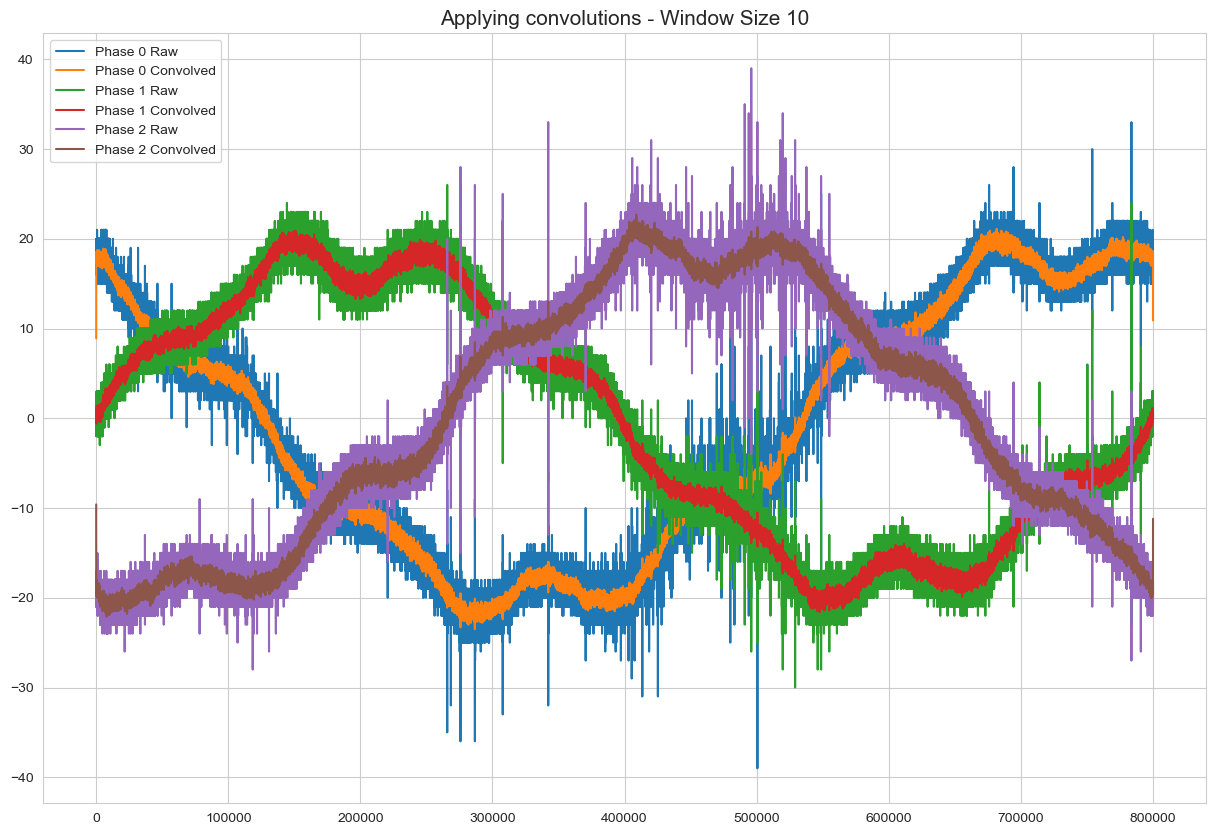

In [7]:
plt.figure(figsize=(15, 10))
window = 10

for phase in range(3):
    sig = signals[0, phase, :]
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    convolved = apply_convolution(sig, window)
    plt.plot(convolved, label=f'Phase {phase} Convolved')

plt.legend()
plt.title(f"Applying convolutions - Window Size {window}", size=15)
plt.show()

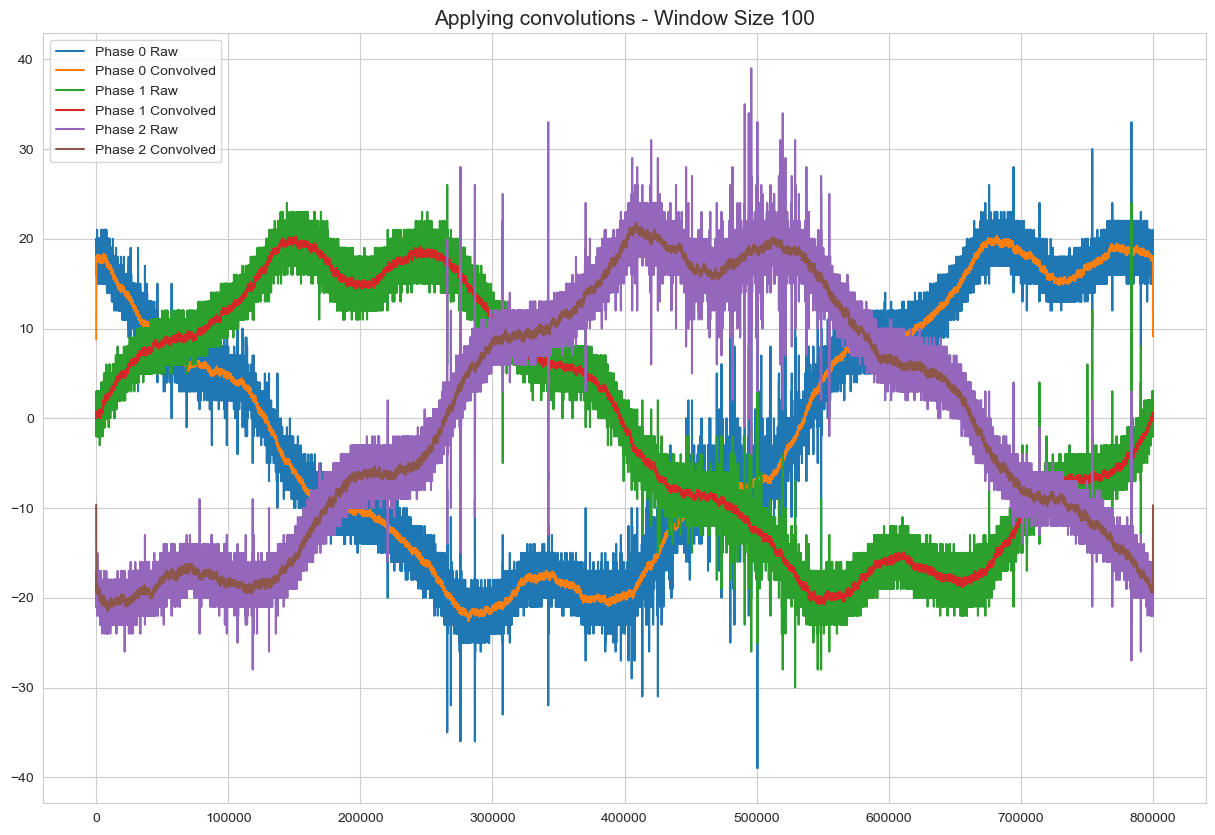

In [8]:
plt.figure(figsize=(15, 10))
window = 100

for phase in range(3):
    sig = signals[0, phase, :]
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    convolved = apply_convolution(sig, window)
    plt.plot(convolved, label=f'Phase {phase} Convolved')

plt.legend()
plt.title(f"Applying convolutions - Window Size {window}", size=15)
plt.show()

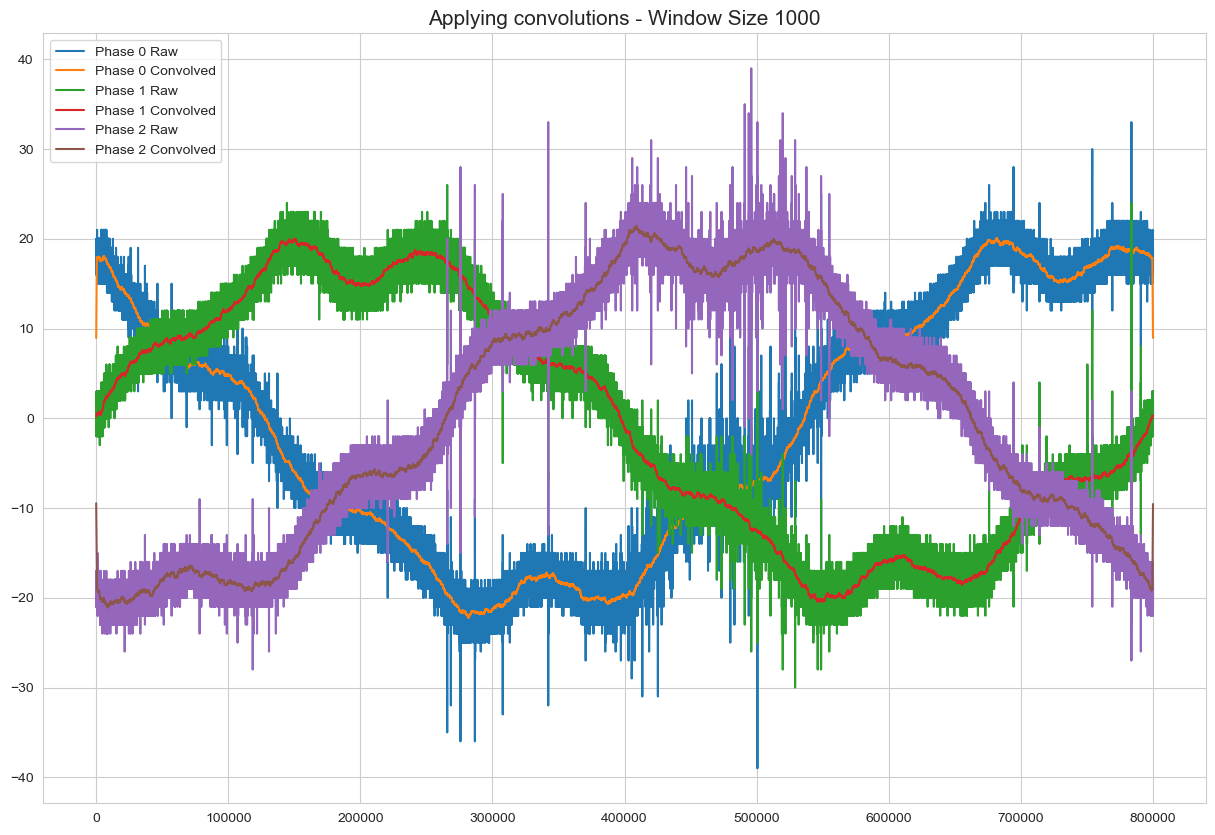

In [9]:
plt.figure(figsize=(15, 10))
window = 1000

for phase in range(3):
    sig = signals[0, phase, :]
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    convolved = apply_convolution(sig, window)
    plt.plot(convolved, label=f'Phase {phase} Convolved')

plt.legend()
plt.title(f"Applying convolutions - Window Size {window}", size=15)
plt.show()

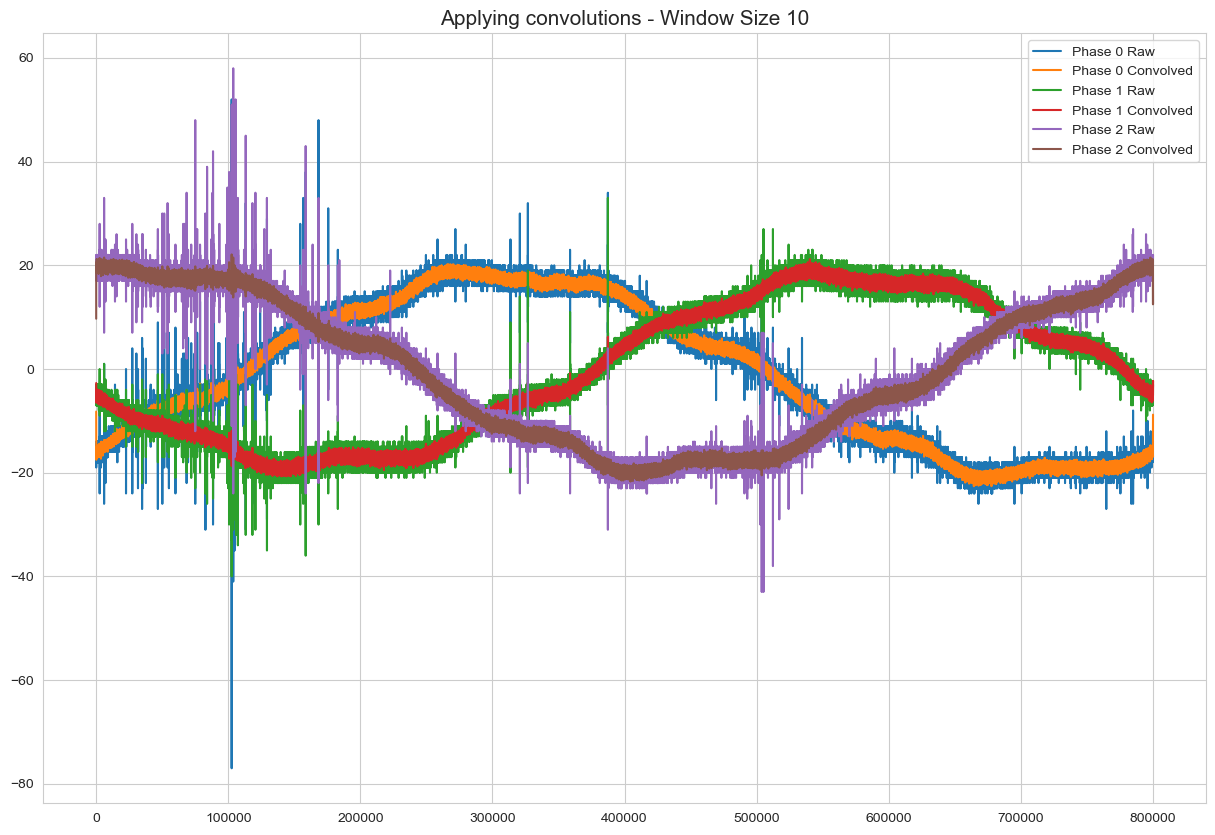

In [10]:
plt.figure(figsize=(15, 10))
window = 10

for phase in range(3):
    sig = signals[1, phase, :]
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    convolved = apply_convolution(sig, window)
    plt.plot(convolved, label=f'Phase {phase} Convolved')

plt.legend()
plt.title(f"Applying convolutions - Window Size {window}", size=15)
plt.show()

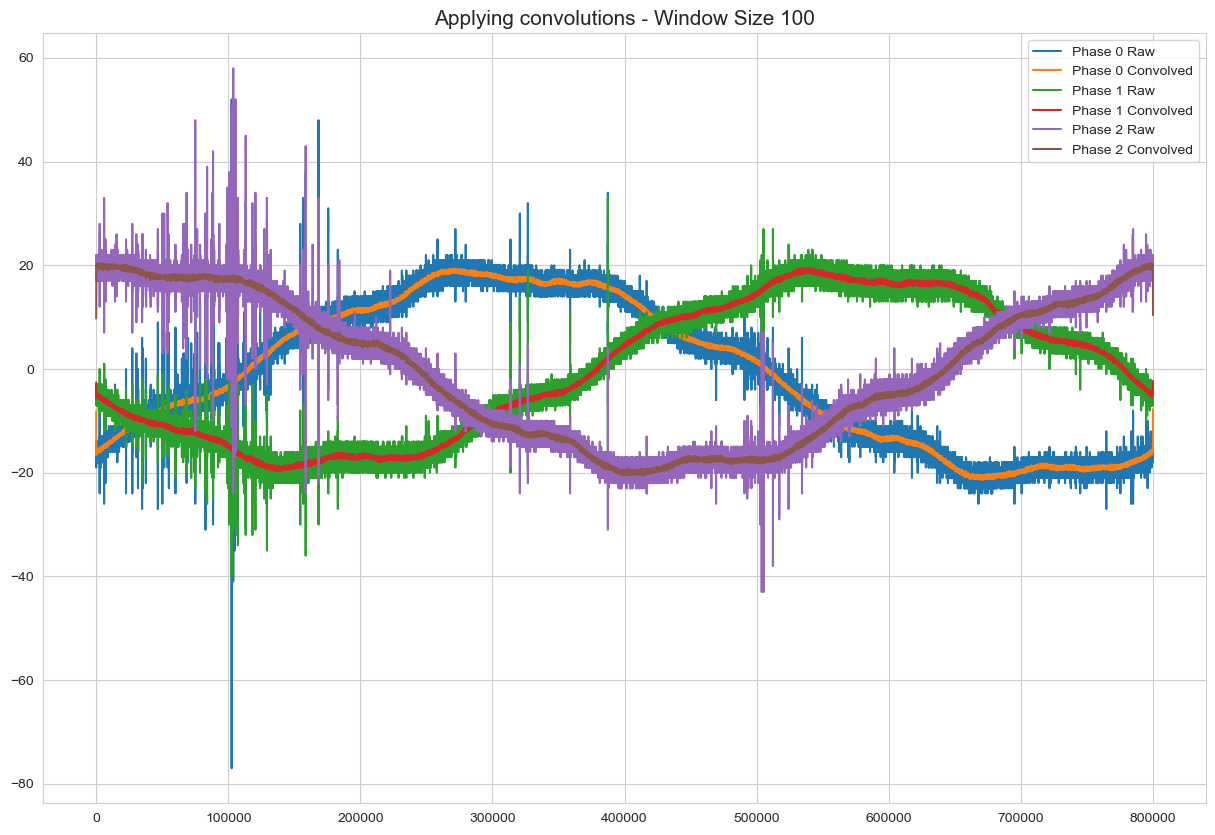

In [11]:
plt.figure(figsize=(15, 10))
window = 100

for phase in range(3):
    sig = signals[1, phase, :]
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    convolved = apply_convolution(sig, window)
    plt.plot(convolved, label=f'Phase {phase} Convolved')

plt.legend()
plt.title(f"Applying convolutions - Window Size {window}", size=15)
plt.show()

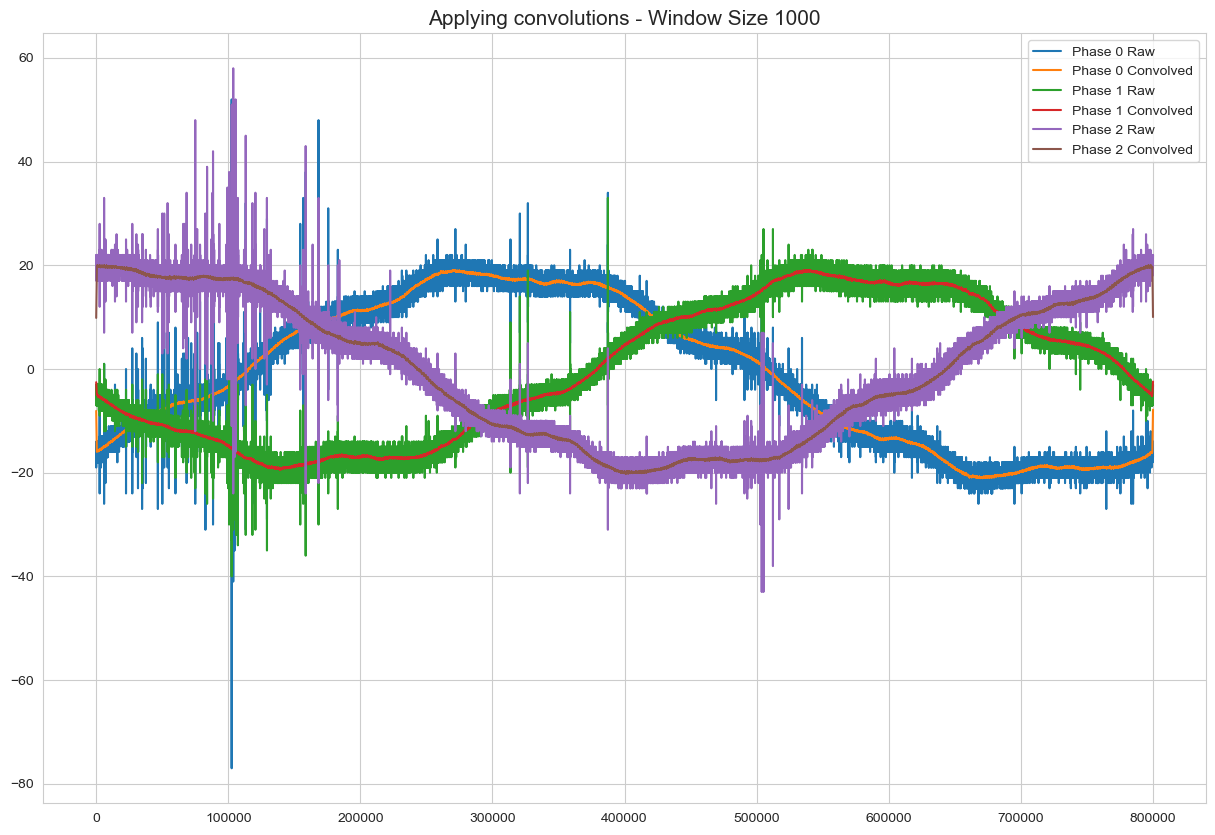

In [12]:
plt.figure(figsize=(15, 10))
window = 1000

for phase in range(3):
    sig = signals[1, phase, :]
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    convolved = apply_convolution(sig, window)
    plt.plot(convolved, label=f'Phase {phase} Convolved')

plt.legend()
plt.title(f"Applying convolutions - Window Size {window}", size=15)
plt.show()

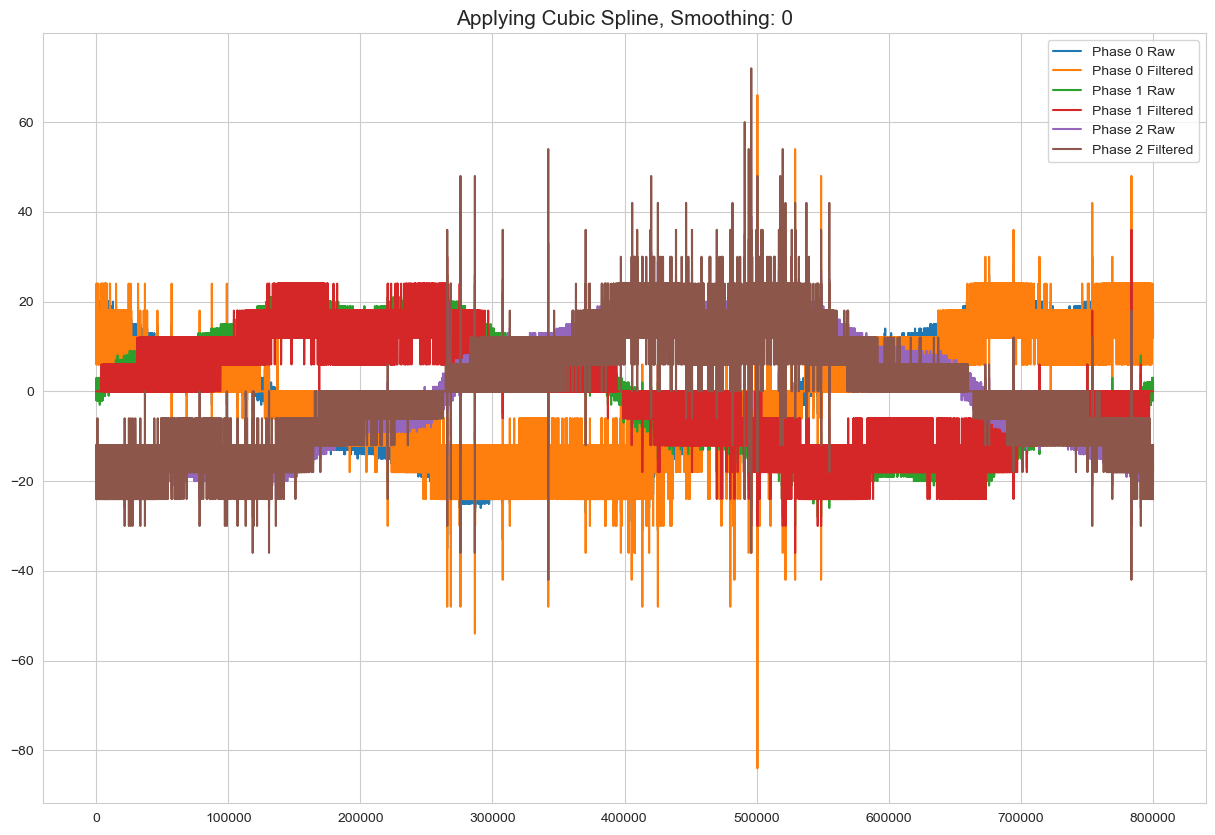

CPU times: total: 4.64 s
Wall time: 7.24 s


In [13]:
%%time
smoothing = 0
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    filtered = signal.cspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Cubic Spline, Smoothing: {smoothing}", size=15)
plt.show()

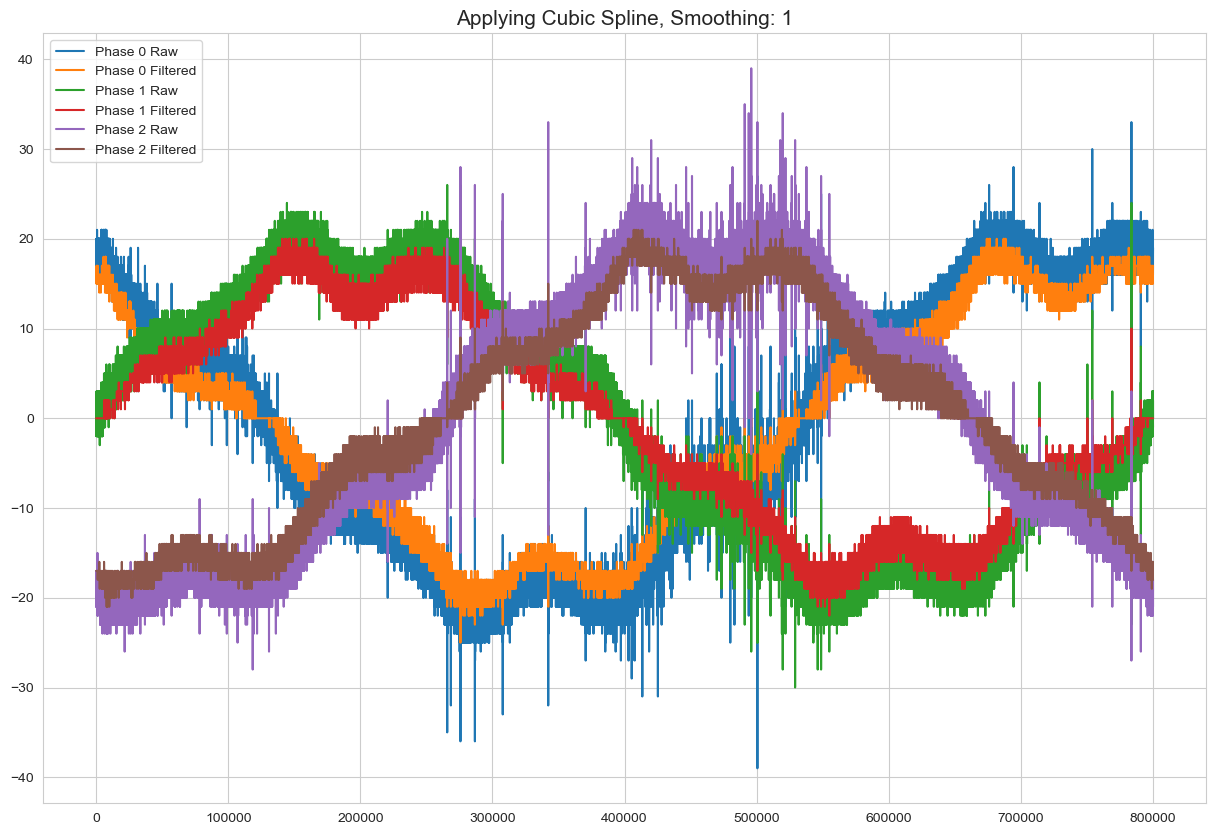

In [14]:
smoothing = 1
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    filtered = signal.cspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Cubic Spline, Smoothing: {smoothing}", size=15)
plt.show()

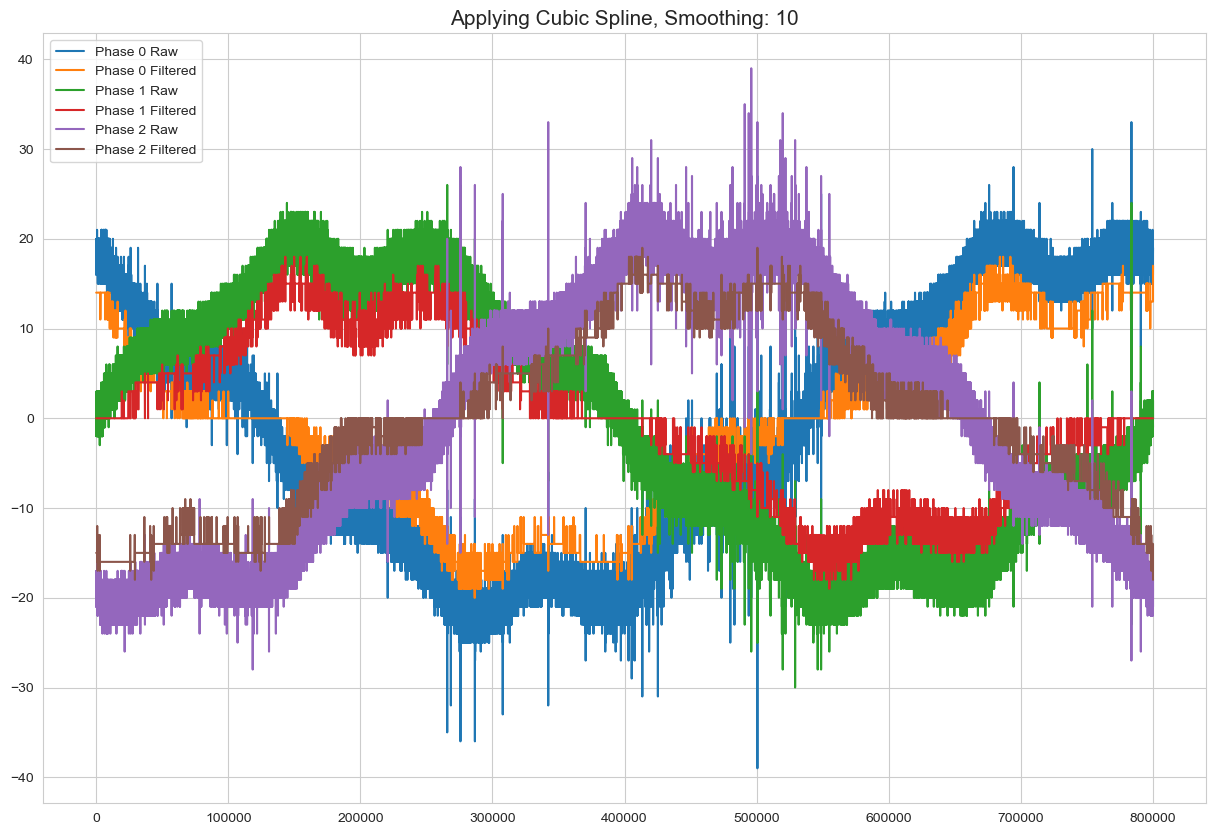

In [15]:
smoothing = 10
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    filtered = signal.cspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Cubic Spline, Smoothing: {smoothing}", size=15)
plt.show()

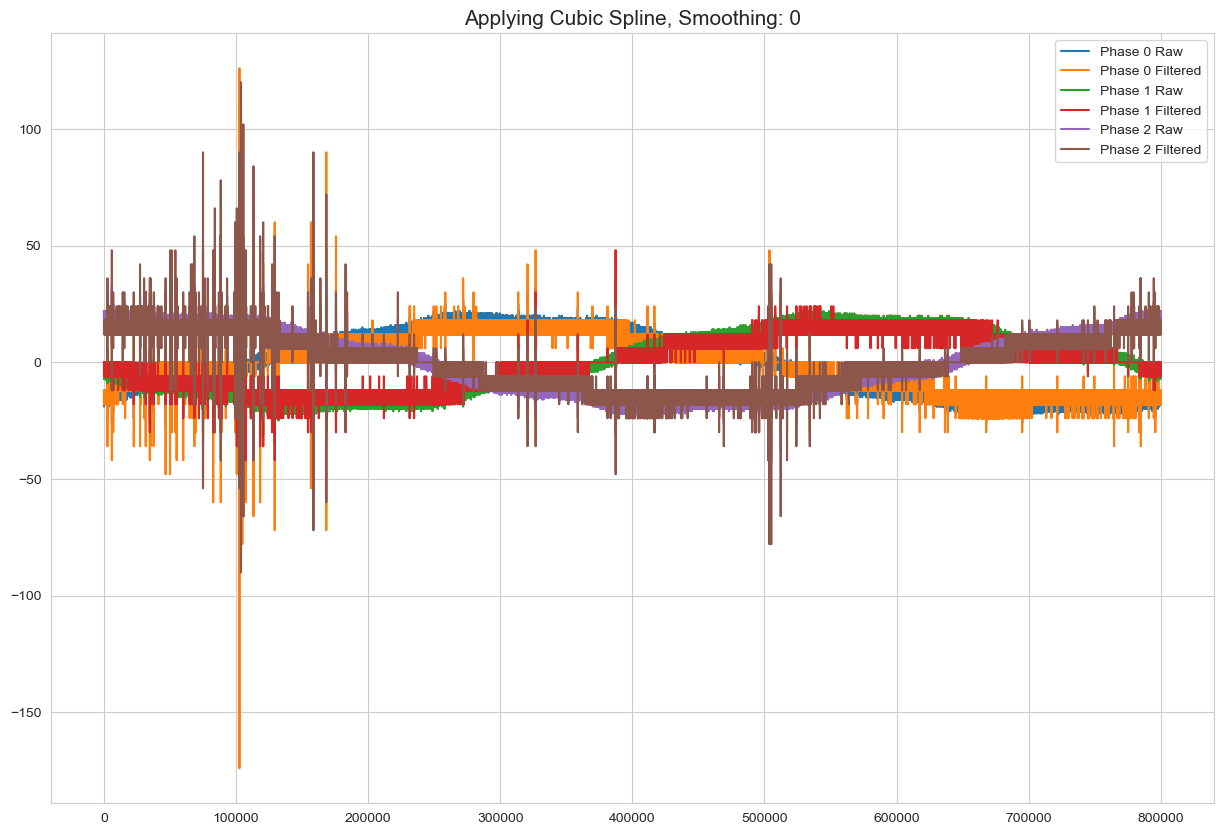

In [16]:
smoothing = 0
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.cspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Cubic Spline, Smoothing: {smoothing}", size=15)
plt.show()

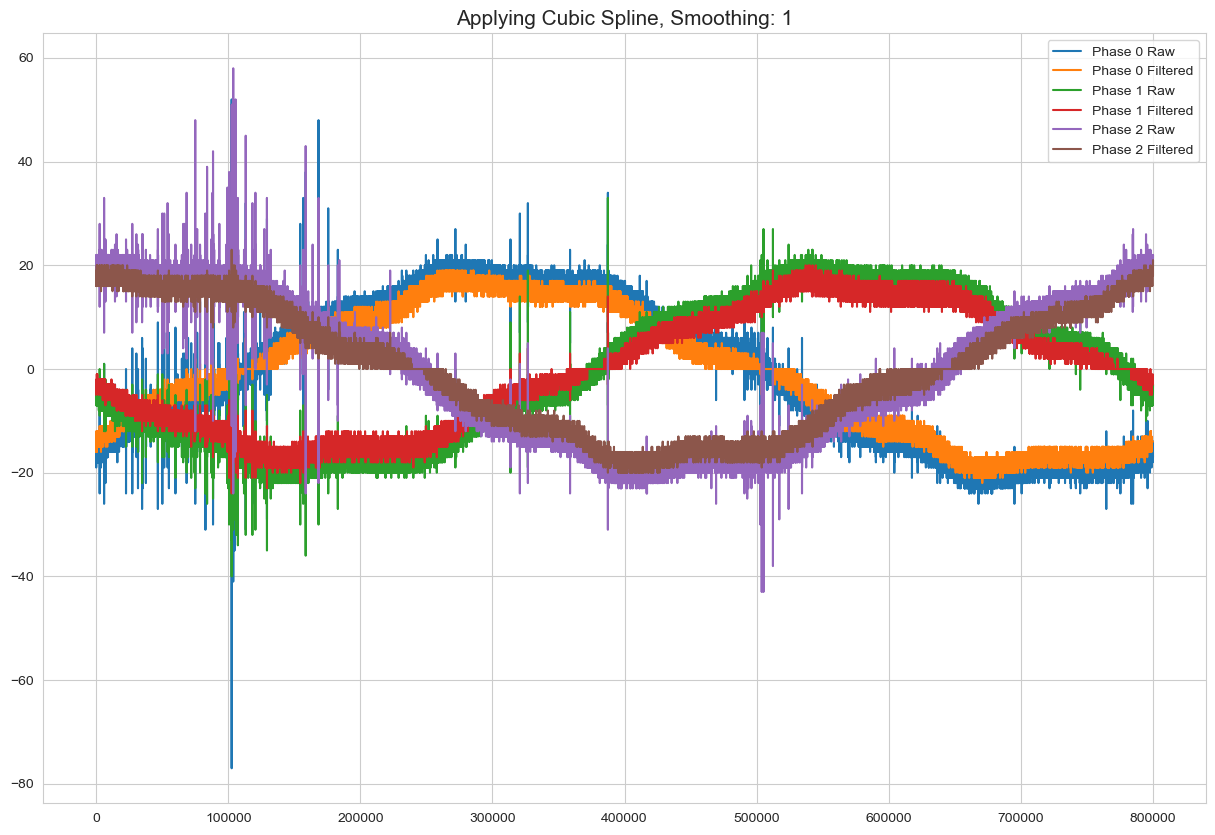

In [17]:
smoothing = 1
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.cspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Cubic Spline, Smoothing: {smoothing}", size=15)
plt.show()

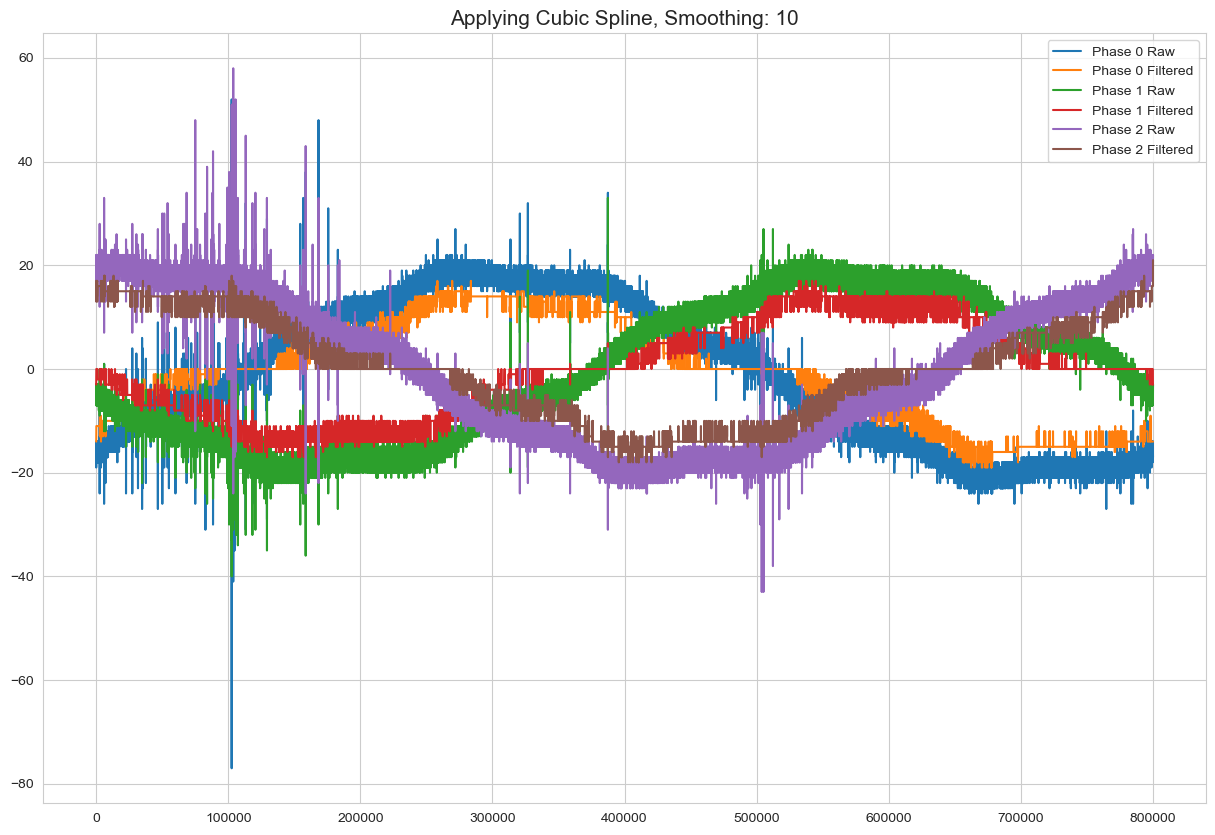

In [18]:
smoothing = 10
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.cspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Cubic Spline, Smoothing: {smoothing}", size=15)
plt.show()

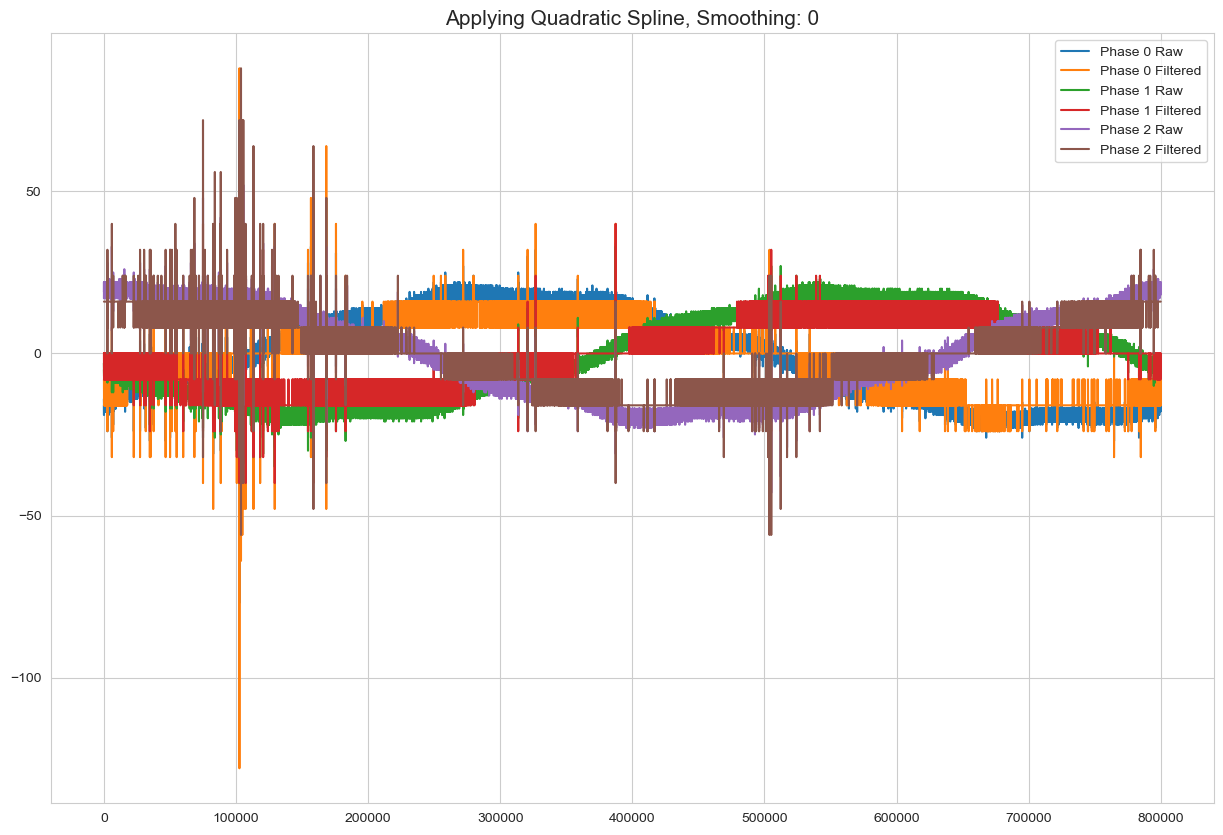

CPU times: total: 5.94 s
Wall time: 6.98 s


In [19]:
%%time
# Start with negative target.
smoothing = 0
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.qspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Quadratic Spline, Smoothing: {smoothing}", size=15)
plt.show()

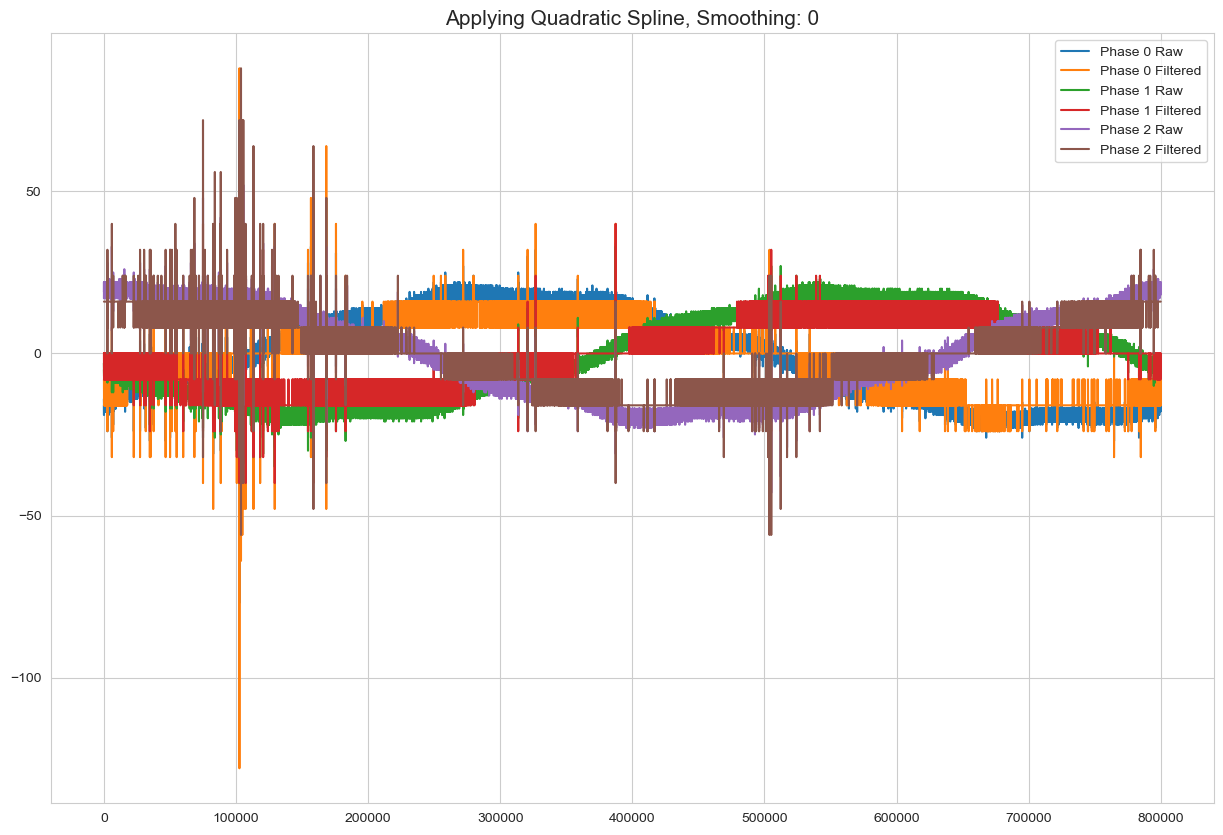

In [20]:
smoothing = 0
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.qspline1d(sig, smoothing)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Quadratic Spline, Smoothing: {smoothing}", size=15)
plt.show()

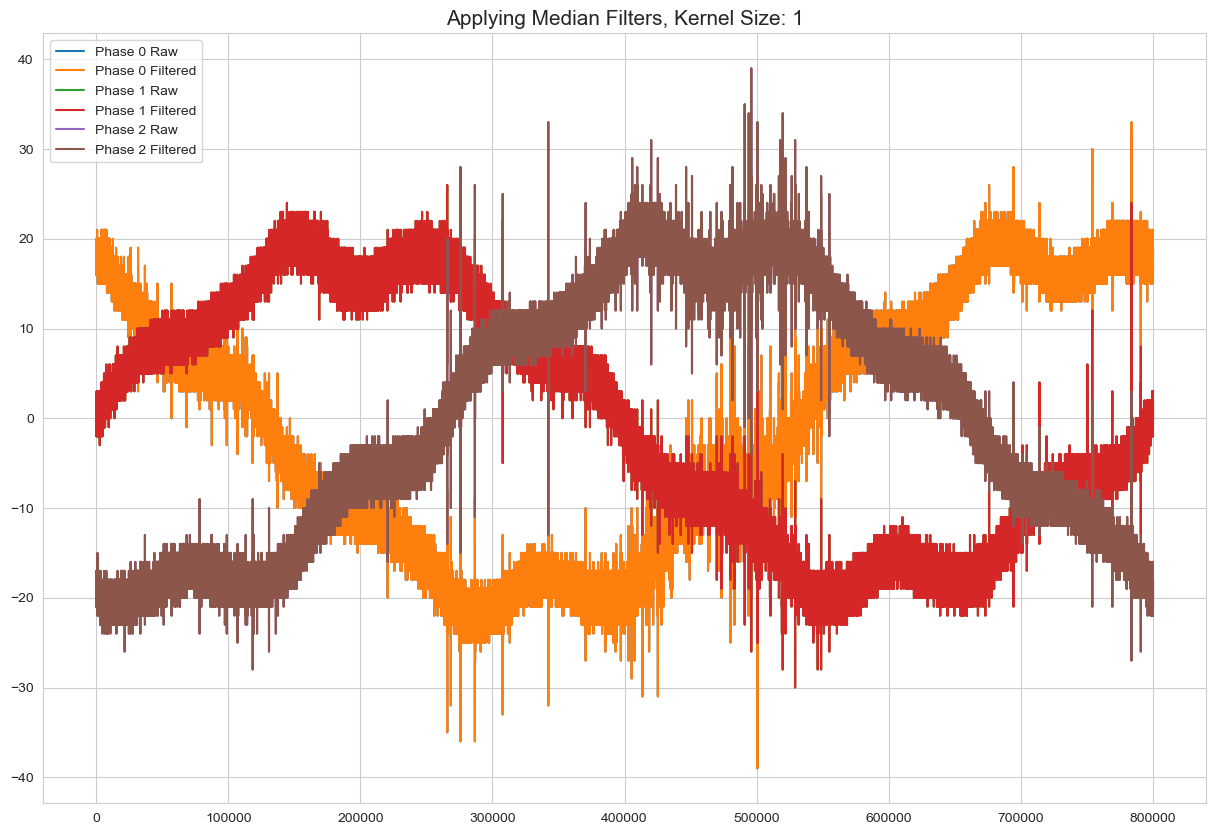

CPU times: total: 4.91 s
Wall time: 6.59 s


In [21]:
%%time
kernel_size = 1
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

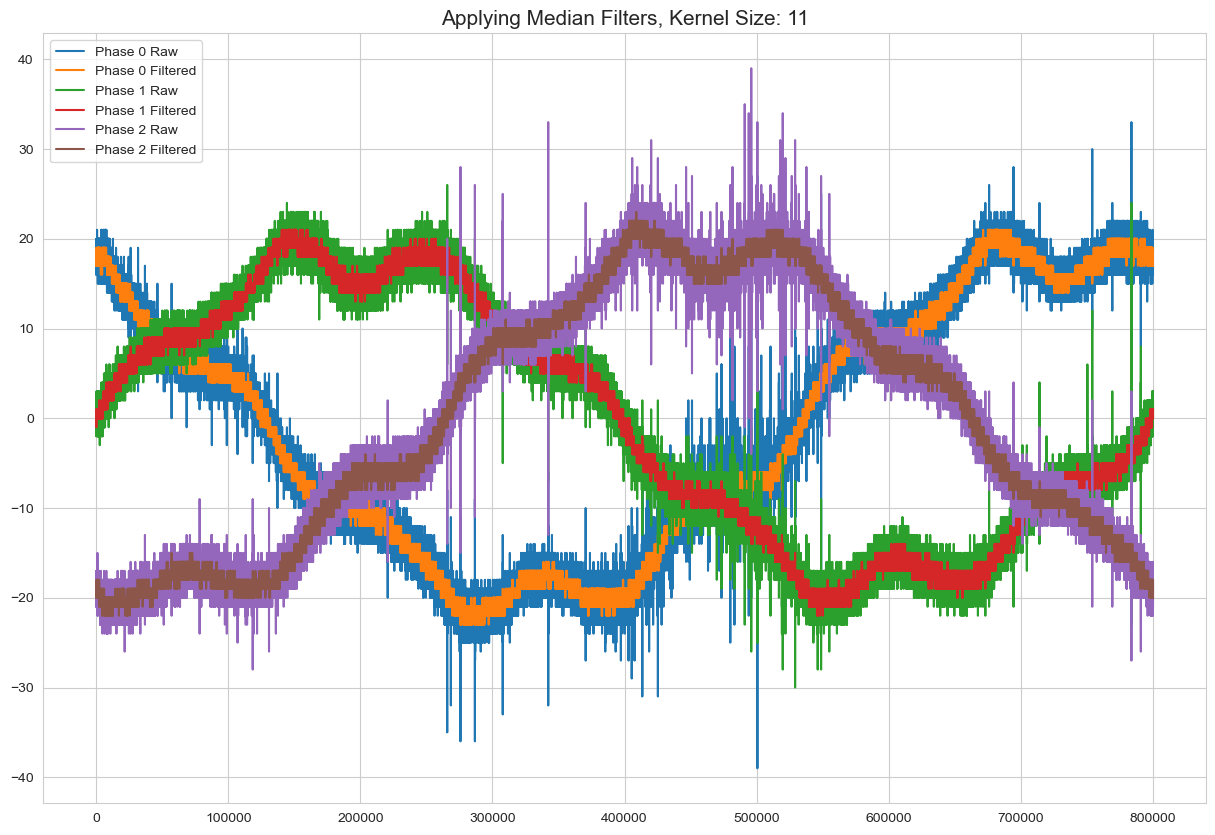

In [22]:
kernel_size = 11
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

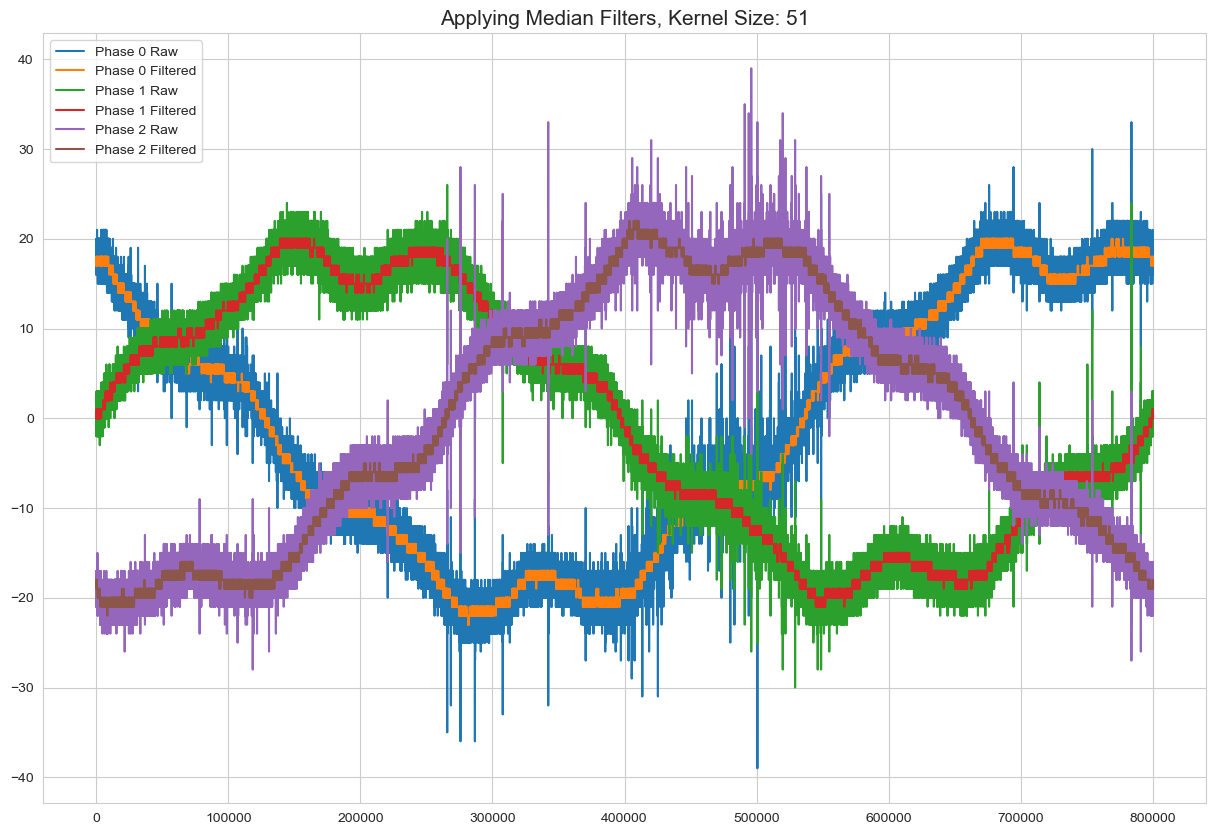

In [23]:
kernel_size = 51
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

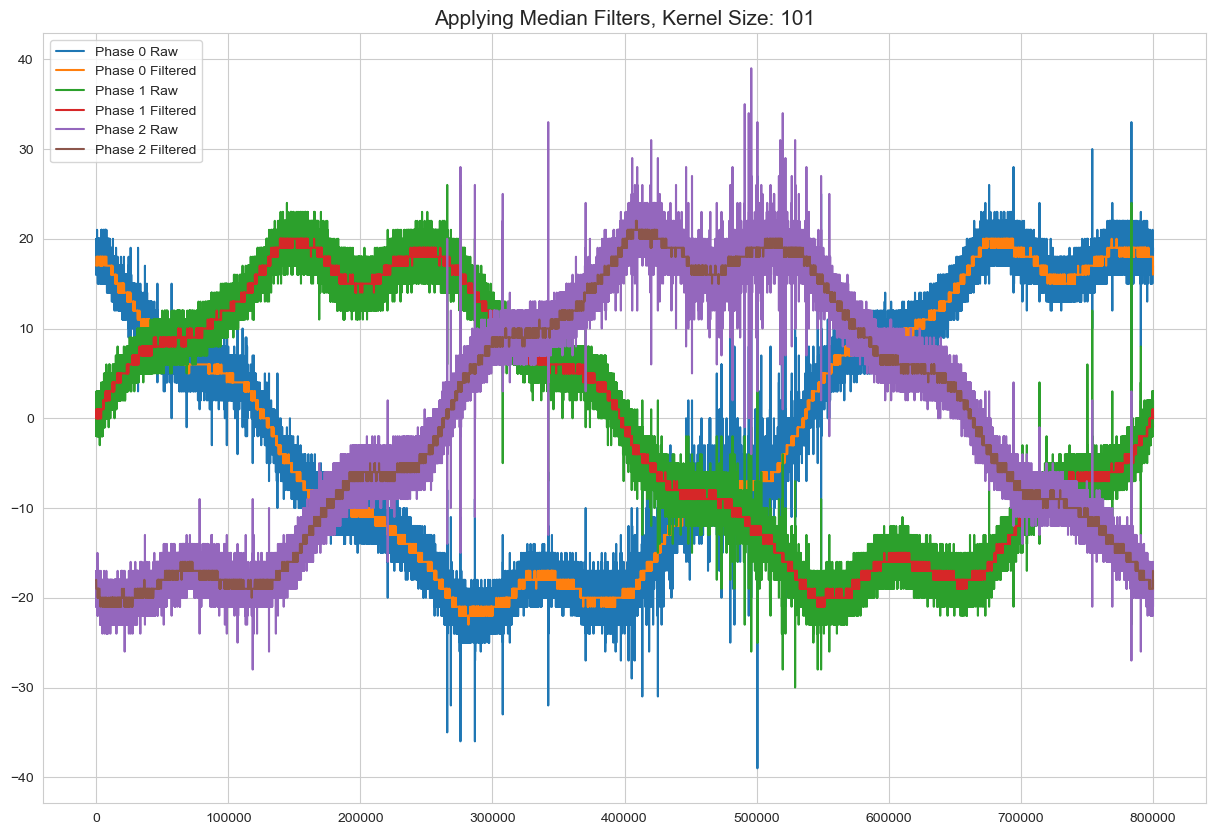

In [24]:
kernel_size = 101
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

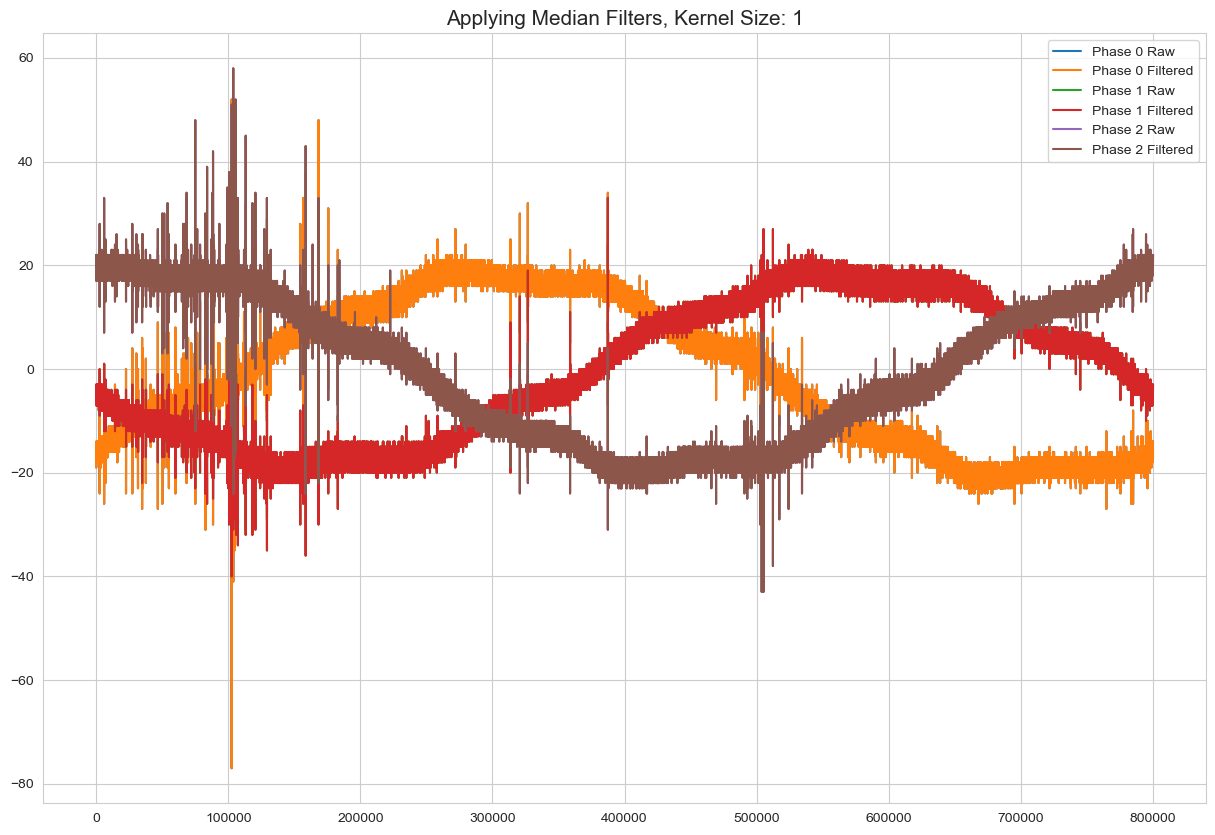

In [25]:
kernel_size = 1
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

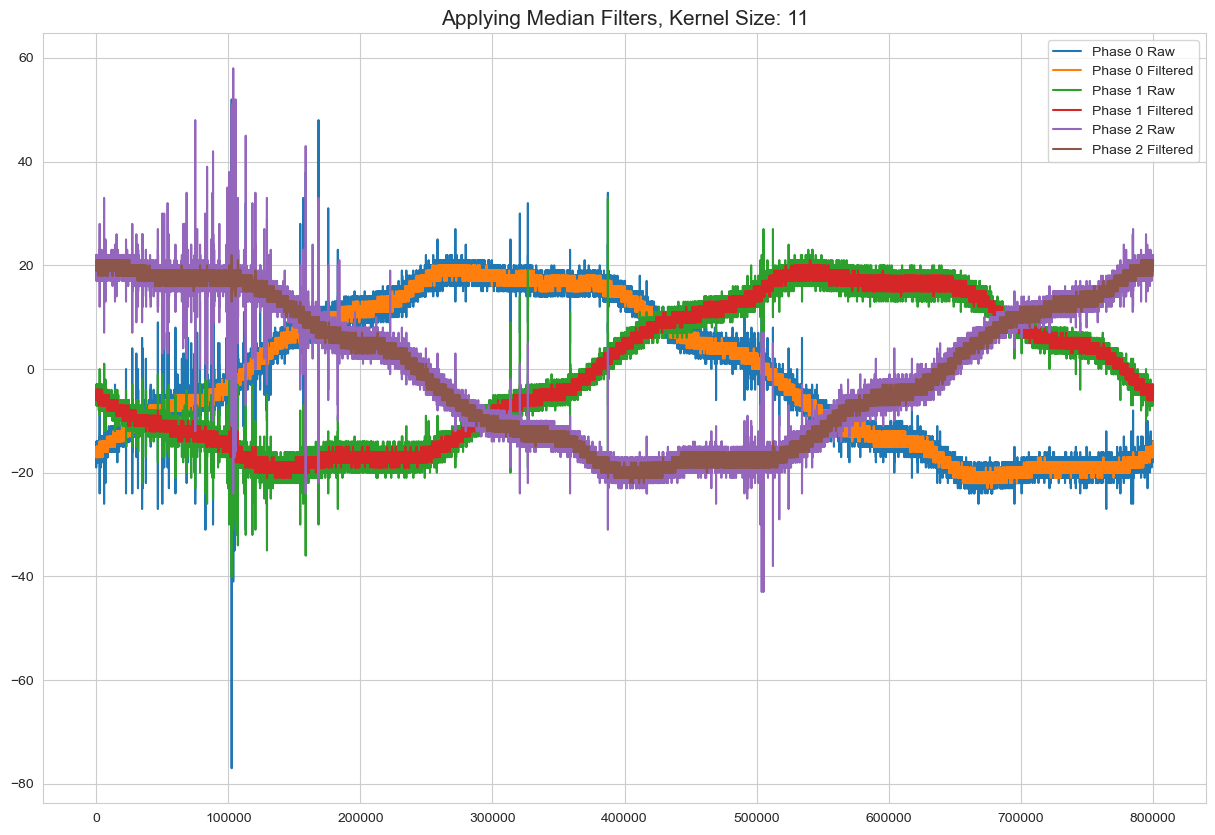

In [26]:
kernel_size = 11
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

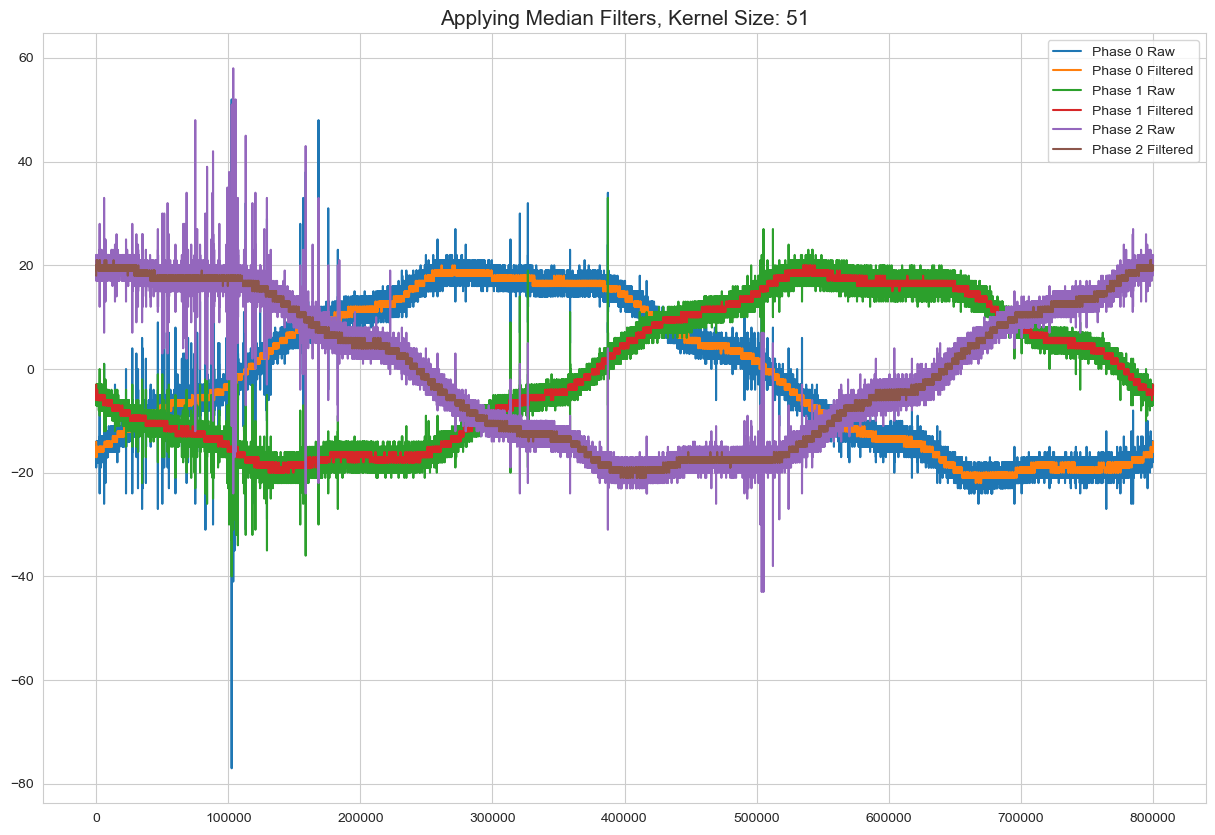

In [27]:
kernel_size = 51
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

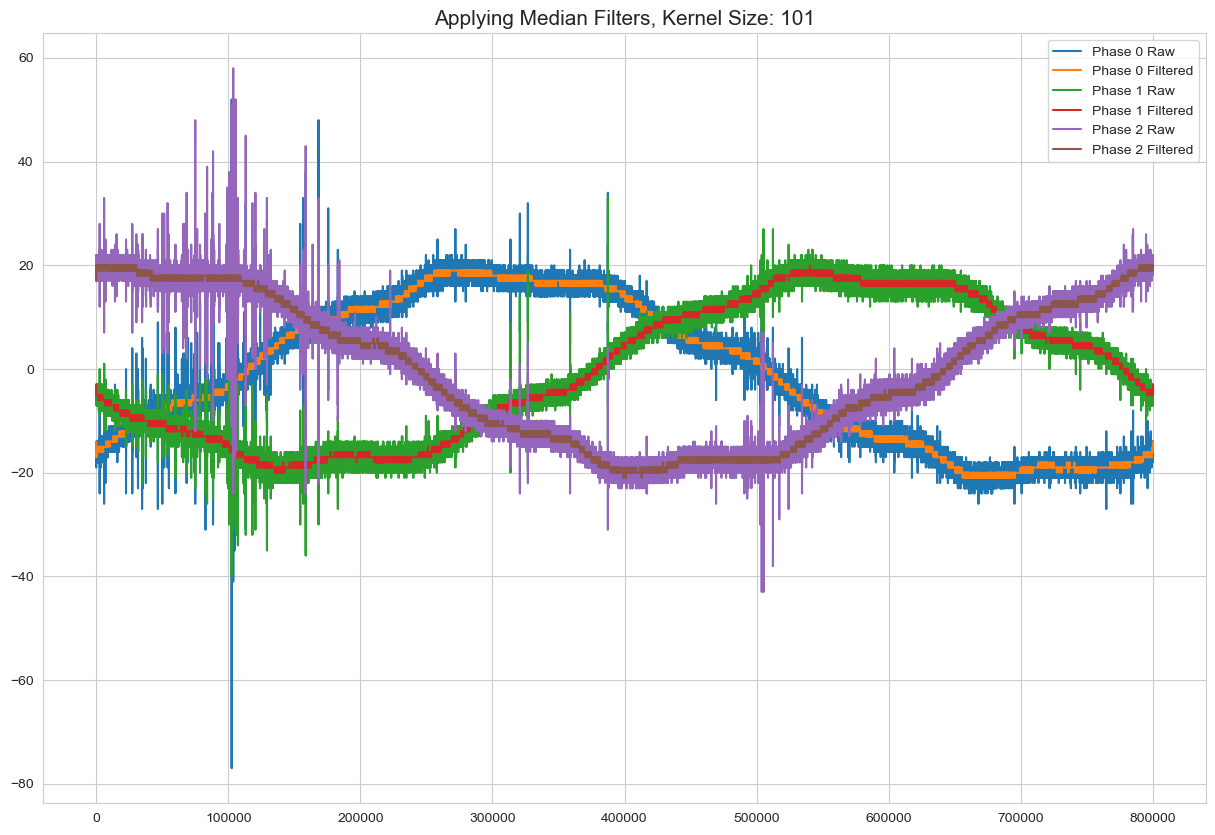

In [28]:
kernel_size = 101
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    filtered = signal.medfilt(sig, kernel_size)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying Median Filters, Kernel Size: {kernel_size}", size=15)
plt.show()

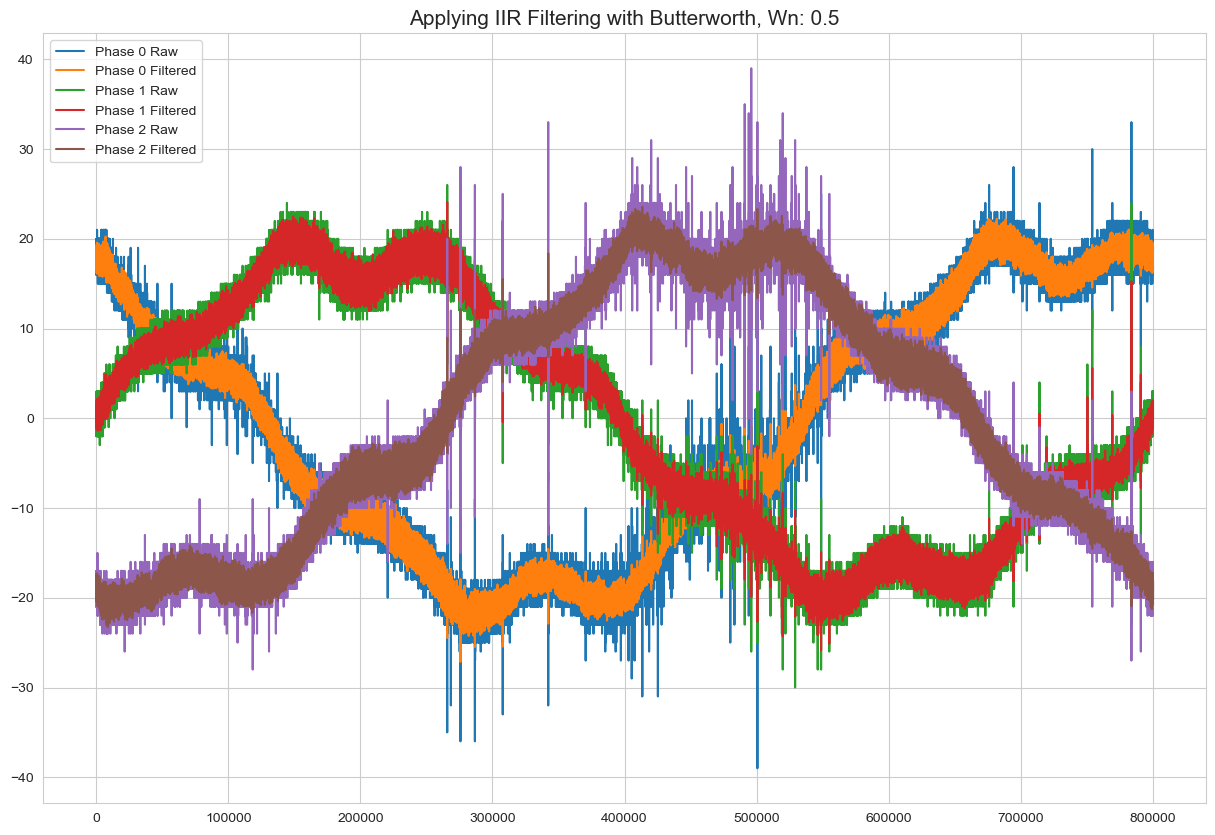

CPU times: total: 4.5 s
Wall time: 6.17 s


In [29]:
%%time
Wn = 0.50
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    
    b, a = signal.butter(3, Wn)
    filtered = signal.filtfilt(b, a, sig)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying IIR Filtering with Butterworth, Wn: {Wn}", size=15)
plt.show()

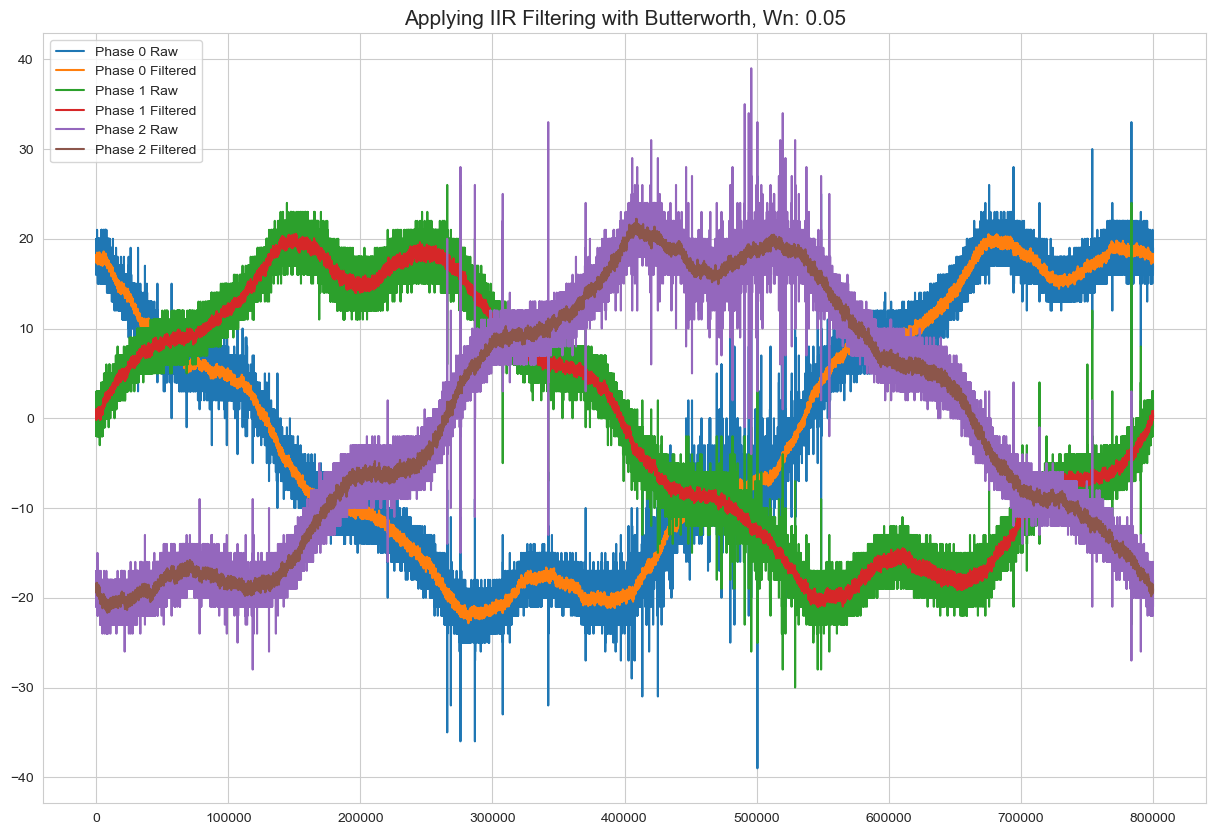

In [30]:
Wn = 0.05
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    
    b, a = signal.butter(3, Wn)
    filtered = signal.filtfilt(b, a, sig)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying IIR Filtering with Butterworth, Wn: {Wn}", size=15)
plt.show()

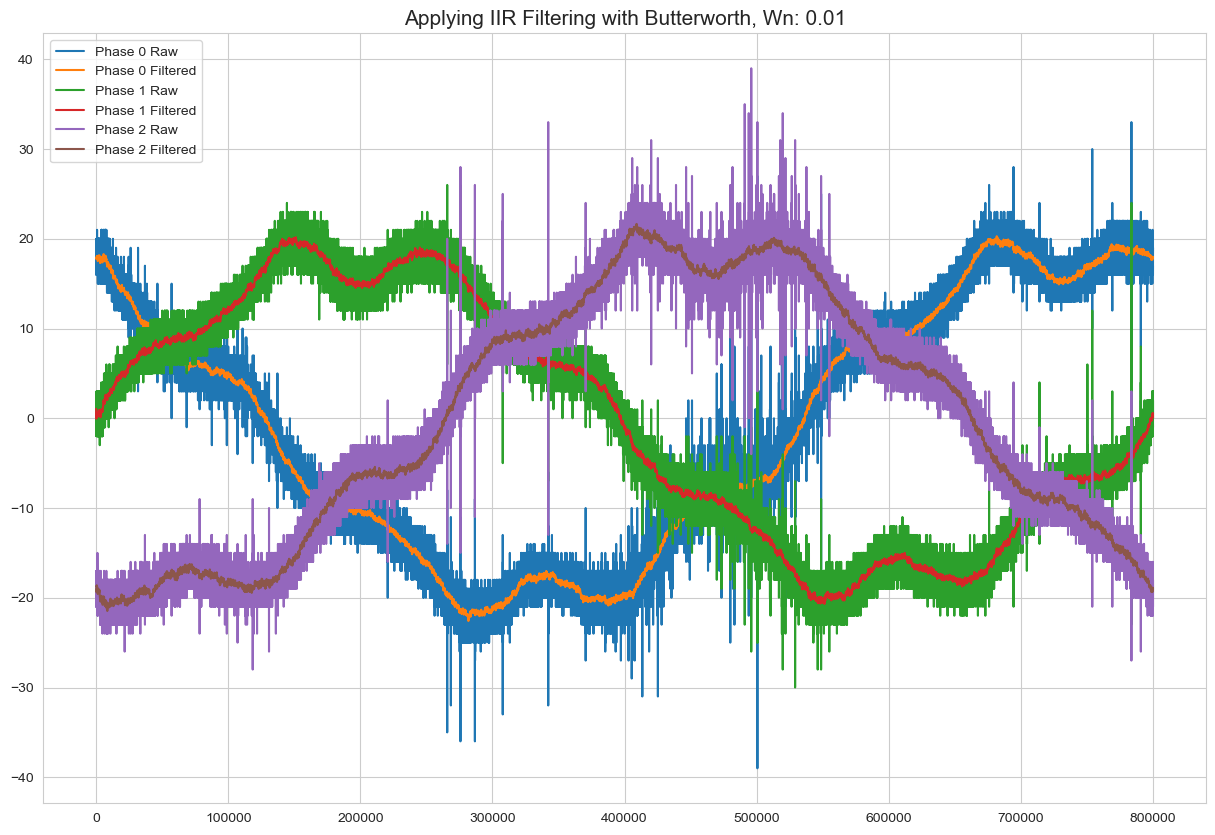

In [31]:
Wn = 0.01
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[0, phase, :]
    
    b, a = signal.butter(3, Wn)
    filtered = signal.filtfilt(b, a, sig)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying IIR Filtering with Butterworth, Wn: {Wn}", size=15)
plt.show()

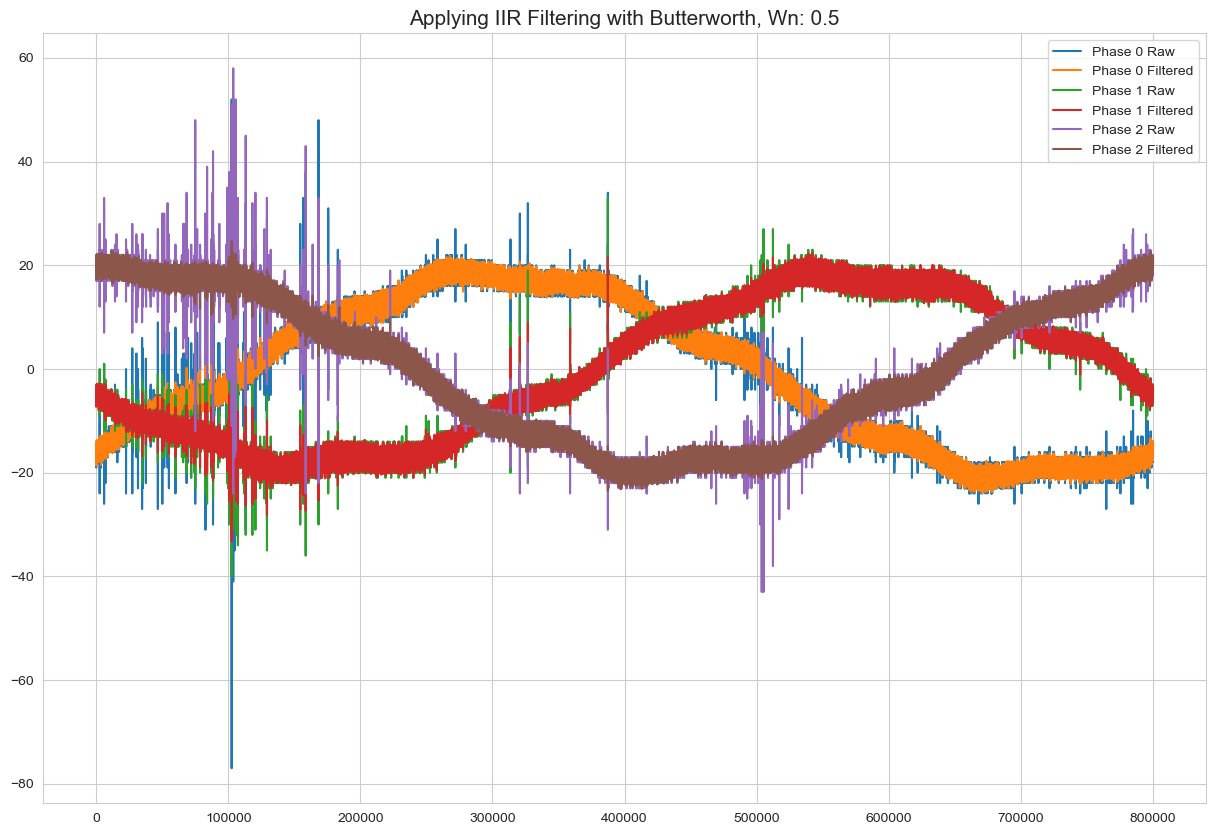

CPU times: total: 2.27 s
Wall time: 3.64 s


In [32]:
%%time
Wn = 0.50
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    
    b, a = signal.butter(3, Wn)
    filtered = signal.filtfilt(b, a, sig)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying IIR Filtering with Butterworth, Wn: {Wn}", size=15)
plt.show()

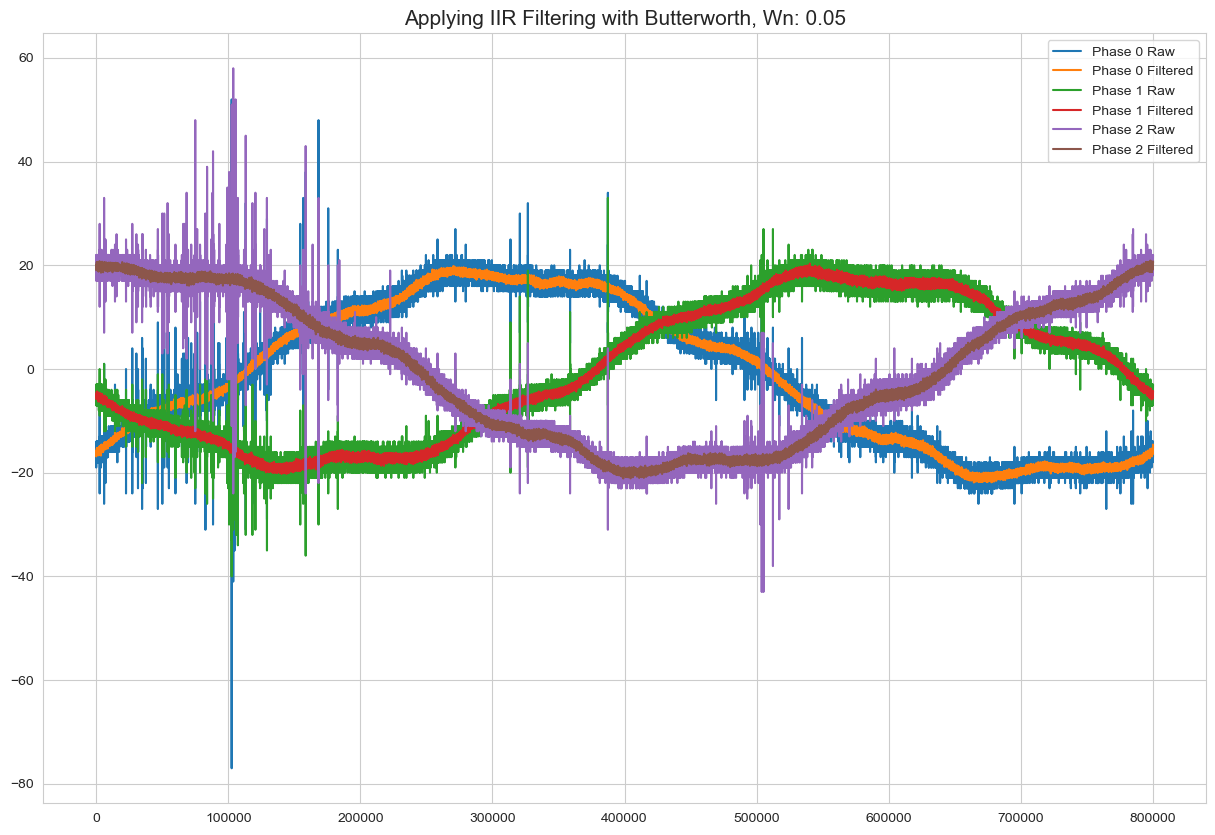

In [33]:
Wn = 0.05
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    
    b, a = signal.butter(3, Wn)
    filtered = signal.filtfilt(b, a, sig)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying IIR Filtering with Butterworth, Wn: {Wn}", size=15)
plt.show()

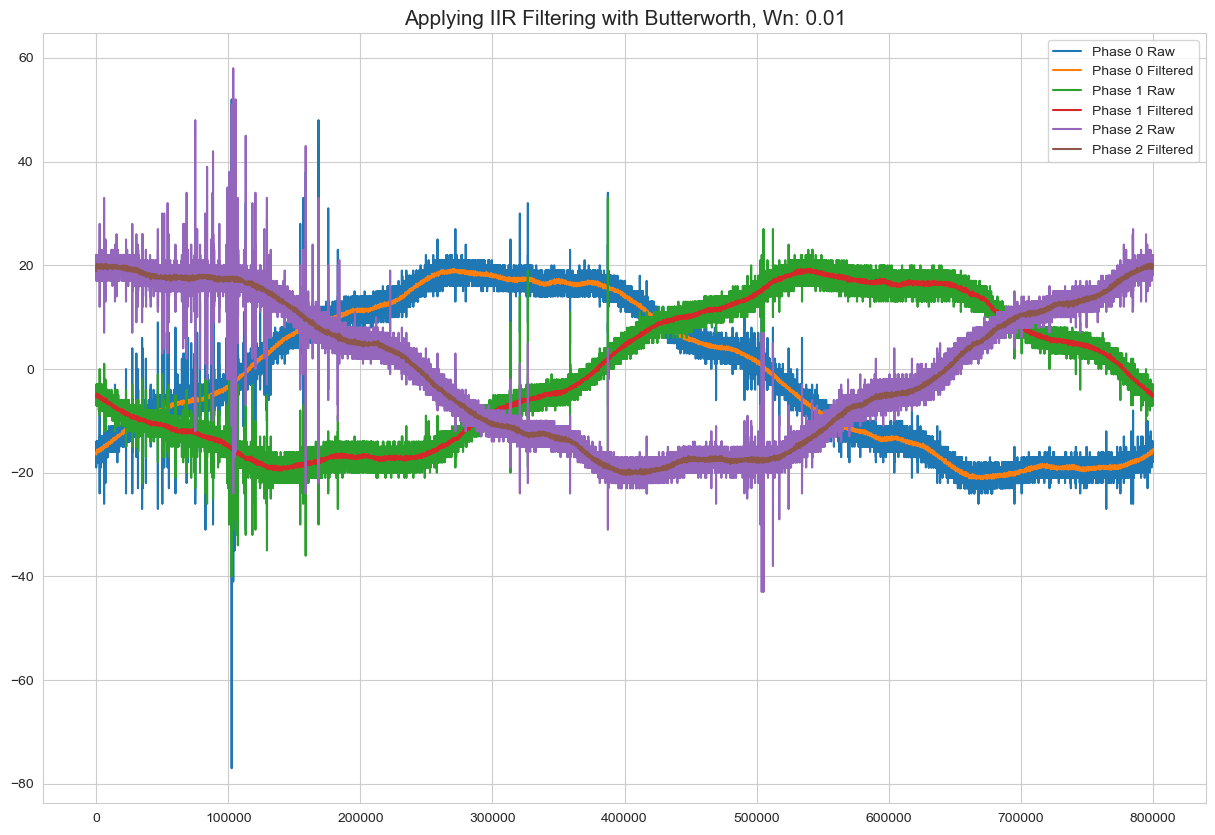

In [34]:
Wn = 0.01
plt.figure(figsize=(15, 10))

for phase in range(3):
    sig = signals[1, phase, :]
    
    b, a = signal.butter(3, Wn)
    filtered = signal.filtfilt(b, a, sig)
    
    plt.plot(sig, label=f'Phase {phase} Raw')
    plt.plot(filtered, label=f'Phase {phase} Filtered')

plt.legend()
plt.title(f"Applying IIR Filtering with Butterworth, Wn: {Wn}", size=15)
plt.show()